### Analyze info from RSEs based on `dcm_rucio_scopes_info.py`

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_hd = pd.read_json('fardet-hd_dune.json')
df_vd = pd.read_json('fardet-vd_dune.json')
df_vd_mc_reco = pd.read_json('fd_vd_mc_reco_dune.json')
df_pd_sp = pd.read_json('protodune-sp.json')
df_pd_dp = pd.read_json('protodune-dp.json')
df_pd_sp_det_rec = pd.read_json('pdsp_det_reco.json')
df_pd_sp_mc_rec = pd.read_json('pdsp_mc_reco.json')
df_hd_pd = pd.read_json('hd-protodune.json')
df_vd_pd = pd.read_json('vd-protodune.json')
df_vd_cold = pd.read_json('vd-coldbox.json')

In [4]:
all_scopes = [df_hd, df_vd, df_vd_mc_reco, df_pd_sp, df_pd_dp,
              df_pd_sp_det_rec, df_pd_sp_mc_rec, df_hd_pd,
             df_vd_pd, df_vd_cold]

In [5]:
df_all_scopes = pd.concat(all_scopes)

In [6]:
grouped_df = df_all_scopes.groupby('scope')['size'].sum().reset_index()

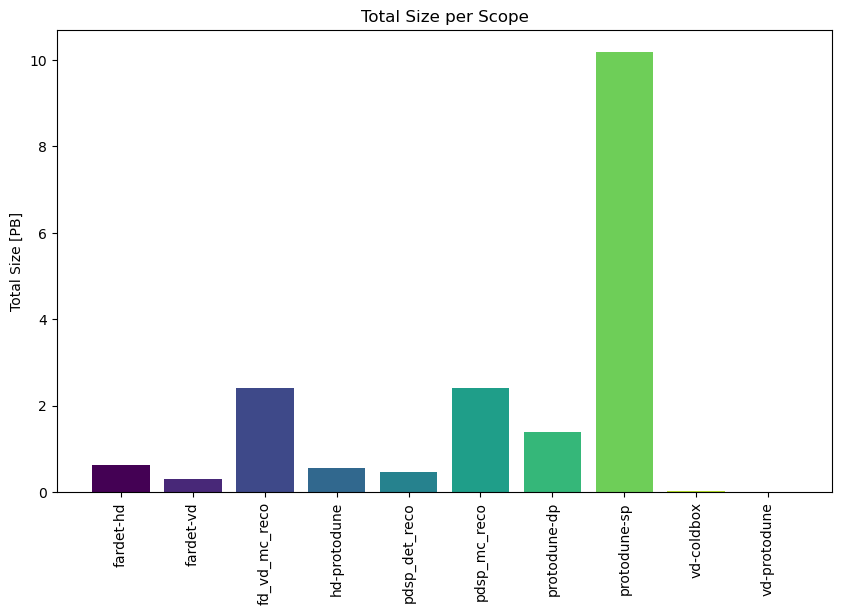

In [7]:
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped_df)))

plt.figure(figsize=(10, 6))
for i, row in grouped_df.iterrows():
    plt.bar(row['scope'], row['size']/1.0e6, color=colors[i])

#plt.xlabel('Scope')
plt.ylabel('Total Size [PB]')
plt.title('Total Size per Scope')
plt.xticks(rotation=90)
plt.savefig('scopes.png', bbox_inches='tight')
plt.show()

* 2023 campaings

In [8]:
df_hd_2023a =  df_hd[df_hd['dataset'].str.contains('fd_mc_2023a')]

In [9]:
df_vd_2023a =  df_vd[df_vd['dataset'].str.contains('fd_mc_2023a')]

In [10]:
df_hd_2023a_reco2 = df_hd[df_hd['dataset'].str.contains('fardet-hd-reco2_ritm1780305')]

In [11]:
df_hd_2023a_he = df_hd[df_hd['dataset'].str.contains('fd_mc_he_2023a')]

In [12]:
df_hd_2023a_he # missing 

,scope,dataset,catalog,did,did_type,site,created_at,updated_at,size,n_files


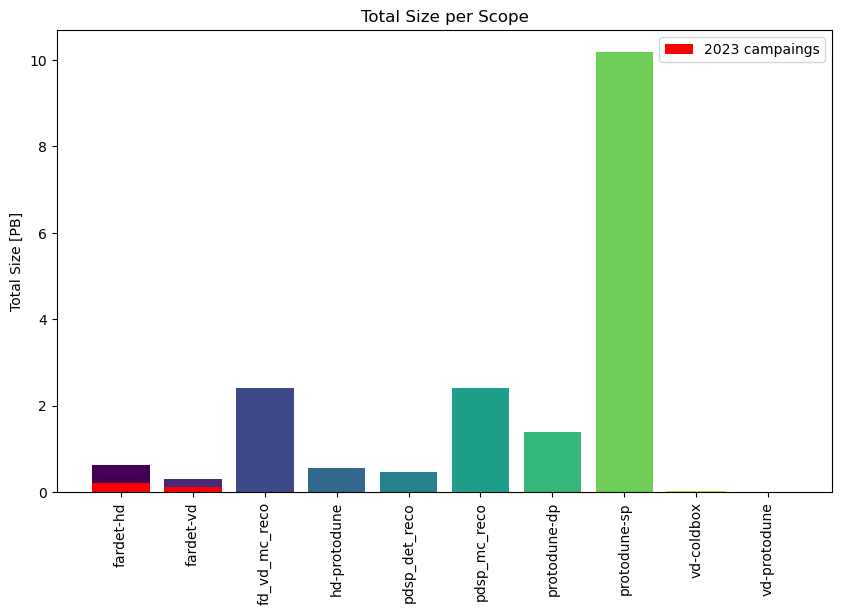

In [13]:
# all campaings 2023
all_df = pd.concat([df_hd_2023a, df_vd_2023a, df_hd_2023a_reco2])
grouped_all_df = all_df.groupby('scope')['size'].sum().reset_index()

plt.figure(figsize=(10, 6))
for i, row in grouped_df.iterrows():
    plt.bar(row['scope'], row['size']/1.0e6, color=colors[i])
plt.bar(grouped_all_df['scope'], grouped_all_df['size']/1.0e6, color='red', label='2023 campaings')

plt.ylabel('Total Size [PB]')
#plt.ylim(0,11)
plt.title('Total Size per Scope')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('scopes_2023.png', bbox_inches='tight')
plt.show()

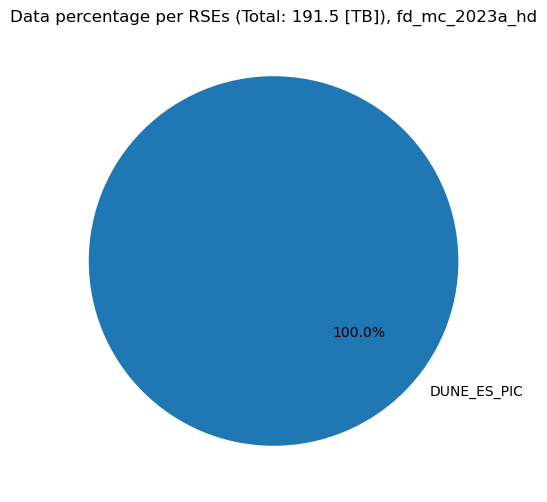

In [14]:
# Group the data by site and sum up the sizes
grouped_df = df_hd_2023a.groupby('site')['size'].sum().reset_index()

# Calculate the total size in TB
total_size = round(grouped_df['size'].sum()/1.0e3,2)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_df['size'], labels=grouped_df['site'], autopct='%1.1f%%', startangle=140)
plt.title(f'Data percentage per RSEs (Total: {total_size} [TB]), fd_mc_2023a_hd')
plt.savefig('fd_mc_2023a_hd.png', bbox_inches='tight')
plt.show()


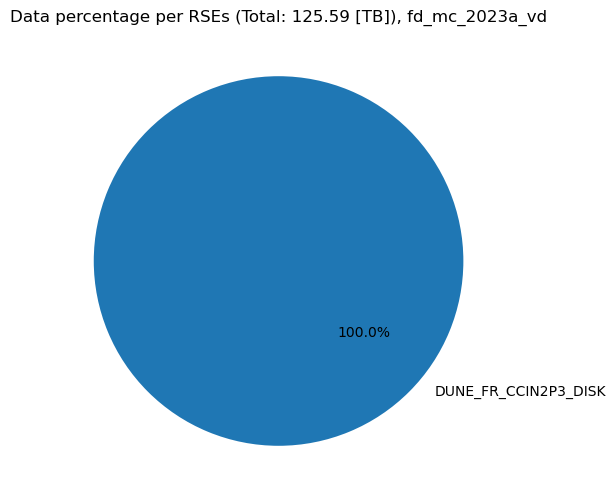

In [15]:
# Group the data by site and sum up the sizes
grouped_df = df_vd_2023a.groupby('site')['size'].sum().reset_index()

# Calculate the total size in TB
total_size = round(grouped_df['size'].sum()/1.0e3,2)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_df['size'], labels=grouped_df['site'], autopct='%1.1f%%', startangle=140)
plt.title(f'Data percentage per RSEs (Total: {total_size} [TB]), fd_mc_2023a_vd')
plt.savefig('fd_mc_2023a_vd.png', bbox_inches='tight')

plt.show()


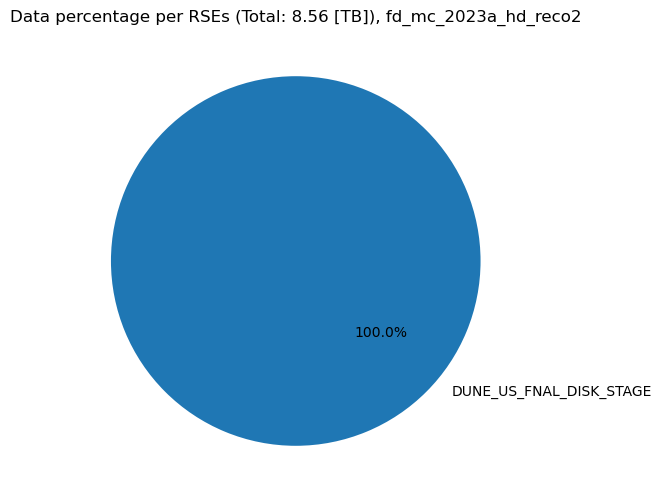

In [16]:
# Group the data by site and sum up the sizes
grouped_df = df_hd_2023a_reco2.groupby('site')['size'].sum().reset_index()

# Calculate the total size in TB
total_size = round(grouped_df['size'].sum()/1.0e3,2)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_df['size'], labels=grouped_df['site'], autopct='%1.1f%%', startangle=140)
plt.title(f'Data percentage per RSEs (Total: {total_size} [TB]), fd_mc_2023a_hd_reco2')
plt.savefig('df_hd_2023a_reco2.png', bbox_inches='tight')

plt.show()


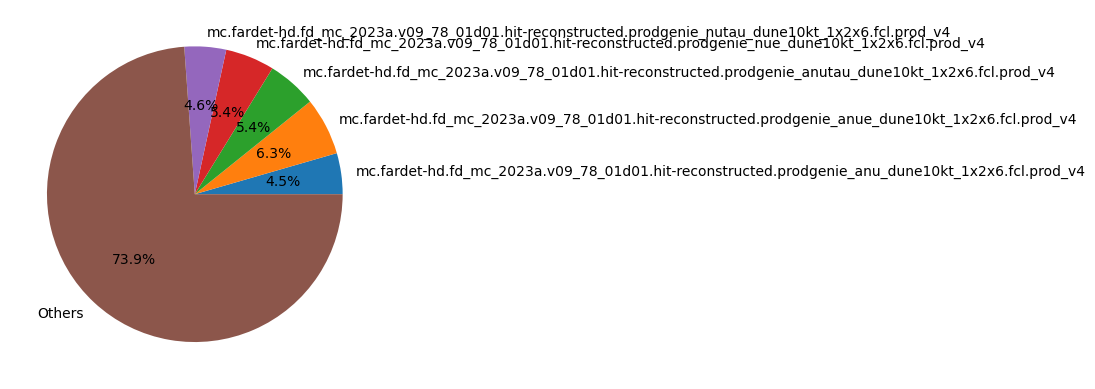

In [17]:
grouped_df = df_hd.groupby(['dataset'])['size'].sum().reset_index()
total_size = grouped_df['size'].sum()

grouped_df['percentage'] = (grouped_df['size'] / total_size) * 100

# Filter out small percentages and sum them
small_percentages_sum = grouped_df[grouped_df['percentage'] < 4]['size'].sum()
small_percentages = pd.DataFrame({'dataset': ['Others'], 'size': [small_percentages_sum], 'percentage': [small_percentages_sum / total_size * 100]})

# Filter out larger percentages
large_percentages = grouped_df[grouped_df['percentage'] >= 4]

# Combine the two DataFrames
final_df = pd.concat([large_percentages, small_percentages], ignore_index=True)

plt.pie(final_df['size'], labels=final_df['dataset'], autopct='%1.1f%%', startangle=0)
plt.savefig('df_hd_scope_datasets.png', bbox_inches='tight')

plt.show()